# IMDB Sentiment Classification with a Fully-Connected Neural Network
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, Matplotlib, TensforFlow, Keras

**Discipline(s):** Natural Language Processing (NLP), Deep Learning

**Keywords:** `binary-classification`, `classification`, `deep-learning`, `fully-connected`, `imdb`, `imdb-movie-reviews`, `imdb-reviews`, `movie-reviews`, `natural-language-processing`, `neural-network`, `nlp`

This notebook provides an implementation of sentiment classification using the IMDB movie reviews dataset and a fully-connected neural network built with TensorFlow and Keras.

## 1. Import Statements

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the 10,000 most-frequently occurring words in the IMDB movie review training dataset from the Keras datasets library.

In [2]:
# Load the IMDB movie reviews dataset.
imdb = tf.keras.datasets.imdb
train_dataset, test_dataset = imdb.load_data(num_words=10000)

In [3]:
# Divide the data into features and labels.
train_data, train_labels = train_dataset
test_data, test_labels = test_dataset

Then, we can use vectorize our data to feed it to our neural network.

In [4]:
def vectorize_dataset(dataset, dimensions=10000):

  results = np.zeros((len(dataset), dimensions))

  # Vectorize the dataset.
  for i, data in enumerate(dataset):
    results[i, data] = 1.0

  return results

In [5]:
# Vectorize the datasets.
X_train = vectorize_dataset(train_data)
X_test = vectorize_dataset(test_data)

# Set up the labels.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

We can then set aside some training samples to create a validation set.

In [6]:
# Create a validation set.
X_validation = X_train[:10000]
X_train = X_train[10000:]
y_validation = y_train[:10000]
y_train = y_train[10000:]

Further, the following are the shapes of each matrix.

In [7]:
# Show the shapes of the data.
print("Training Data:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing Data:", X_test.shape)
print("Testing Labels:", y_test.shape)
print("Validation Data:", X_validation.shape)
print("Validation Labels:", y_validation.shape)

Training Data: (15000, 10000)
Training Labels: (15000,)
Testing Data: (25000, 10000)
Testing Labels: (25000,)
Validation Data: (10000, 10000)
Validation Labels: (10000,)


## 3. Neural Network

---



### 3.1. Define the Model

We then have to define our neural network. Here, we define a sequential model with three fully-connected layers.

In [8]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [9]:
# Add three fully-connected layers to the network.
model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [10]:
# Show the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80008     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


Once our model is defined, we can compile it using the Adam optimizer and the binary cross-entropy loss function.

In [11]:
# Compile the model.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 4 epochs, using a batch size of 256.

In [12]:
# Define the parameters.
num_epochs = 4
batch_size = 256

# Train the model.
history = model.fit(X_train,
                    y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_validation, y_validation))

Epoch 1/4
59/59 [==============================] - 1s 21ms/step - loss: 0.6289 - accuracy: 0.6315 - val_loss: 0.5513 - val_accuracy: 0.7834
Epoch 2/4
59/59 [==============================] - 1s 16ms/step - loss: 0.4875 - accuracy: 0.8446 - val_loss: 0.4648 - val_accuracy: 0.8439
Epoch 3/4
59/59 [==============================] - 1s 16ms/step - loss: 0.3184 - accuracy: 0.9148 - val_loss: 0.2877 - val_accuracy: 0.8886
Epoch 4/4
59/59 [==============================] - 1s 17ms/step - loss: 0.1794 - accuracy: 0.9449 - val_loss: 0.2779 - val_accuracy: 0.8887


### 3.3. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

782/782 [==============================] - 1s 2ms/step - loss: 0.2933 - accuracy: 0.8815
Test Accuracy: 0.8814799785614014
Test Loss: 0.29327258467674255


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [14]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [15]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

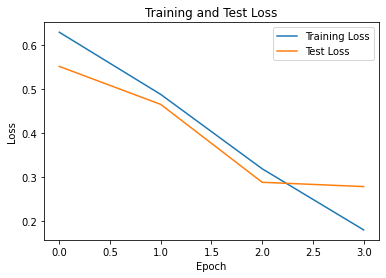

In [16]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [17]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

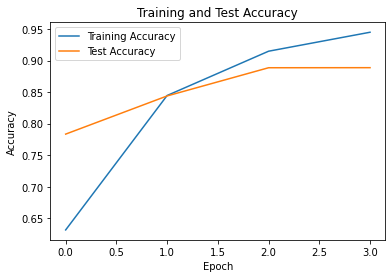

In [18]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()